# Analyse der Wohnungsmärkte in der Schweiz (2012-2023)



---

## Ausgangslage
In diesem Jupyter Notebook untersuchen wir die Entwicklung der Wohnungsmieten und die Dynamik der Leerstände in der Schweiz über die letzten Jahrzehnte. Unser Fokus liegt auf der Zeitperiode von 2012 bis 2022 für die Mietpreise und von 1995 bis 2023 für die leerstehenden Wohnungen. Diese Analyse beinhaltet die Betrachtung regionaler Unterschiede, insbesondere auf Kantonsebene, und die Untersuchung möglicher Korrelationen zwischen den Mieten, den Leerständen und dem hypothekarischen Referenzzinssatz.


### Zielsetzungen

1. **Entwicklung der Mietpreise (2012-2022):** Untersuchung der Trends in den Wohnungsmieten auf nationaler und kantonaler Ebene. Identifikation von Regionen mit signifikanten Preissteigerungen oder -senkungen.
   
2. **Korrelation mit dem hypothekarischen Referenzzinssatz:** Analyse der Beziehung zwischen den Mietpreisen und dem hypothekarischen Referenzzinssatz, um potenzielle Einflüsse auf die Mietpreisentwicklung zu erkennen.

3. **Leerstehende Wohnungen (1995-2023):** Untersuchung der Entwicklung leerstehender Wohnungen in der Schweiz, inklusive regionaler Unterschiede. Identifikation von Trends und möglichen Ursachen für Veränderungen im Zeitverlauf.

4. **Zusammenhang zwischen Mieten und Leerständen:** Analyse der Beziehung zwischen den Wohnungsmieten und den Leerständen, um Einblicke in das Angebot-Nachfrage-Verhältnis auf dem Wohnungsmarkt zu gewinnen.

### Datenquellen

Die Analyse stützt sich auf mehrere Datenquellen:

- **Mietpreisdaten:** Diese Daten sollten Informationen zu den durchschnittlichen Mietpreisen pro Quadratmeter nach Kantonen und Jahren enthalten.
- **Leerstandsdaten:** Daten über die Anzahl leerstehender Wohnungen, ebenfalls aufgeschlüsselt nach Kantonen und Jahren.
- **Hypothekarischer Referenzzinssatz:** Historische Daten zum Referenzzinssatz, der für die Berechnung von Mietzinsanpassungen in der Schweiz verwendet wird.

### Methodik

1. **Datenbeschaffung und -bereinigung:** Importieren, Überprüfen und Bereinigen der Daten, um sie für die Analyse vorzubereiten.
   
2. **Explorative Datenanalyse (EDA):** Erste Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um Trends und Muster zu identifizieren.
   
3. **Tiefere Analyse:**
   - **Mietpreise:** Anwendung statistischer Modelle, um die Entwicklung der Mietpreise zu verstehen und kantonale Unterschiede hervorzuheben.
   - **Leerstände:** Analyse der Leerstandsraten im zeitlichen Verlauf und nach Regionen.
   - **Korrelationsanalyse:** Einsatz von Korrelationskoeffizienten und möglicherweise multivariaten Analysen, um Beziehungen zwischen den Mietpreisen, den Leerständen und dem Referenzzinssatz zu untersuchen.# Neuer Abschnitt

### Struktur des Notebooks

1. **Einleitung und Zielsetzung**
2. **Datenbeschaffung und -vorbereitung**
3. **Explorative Datenanalyse**
4. **Analyse der Mietpreisentwicklung**
5

. **Analyse der Leerstände**
6. **Korrelationsanalyse**
7. **Zusammenfassung und Schlussfolgerungen**

### Erwartete Ergebnisse

- Ein umfassendes Bild der Entwicklungen auf dem Schweizer Wohnungsmarkt im untersuchten Zeitraum.
- Einblicke in die regionale Dynamik der Wohnungsmärkte.
- Verständnis der Einflüsse des hypothekarischen Referenzzinssatzes auf die Mietpreisentwicklung.
- Identifikation von Mustern, die die Entwicklung der Leerstände erklären könnten.



---

## Datenanalyse

In [ ]:
# Beispiel-DataFrame, ersetzen Sie dies durch Ihren echten DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx")
df.head()


,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


###Entwicklung der Mietpreise (2012-2022)

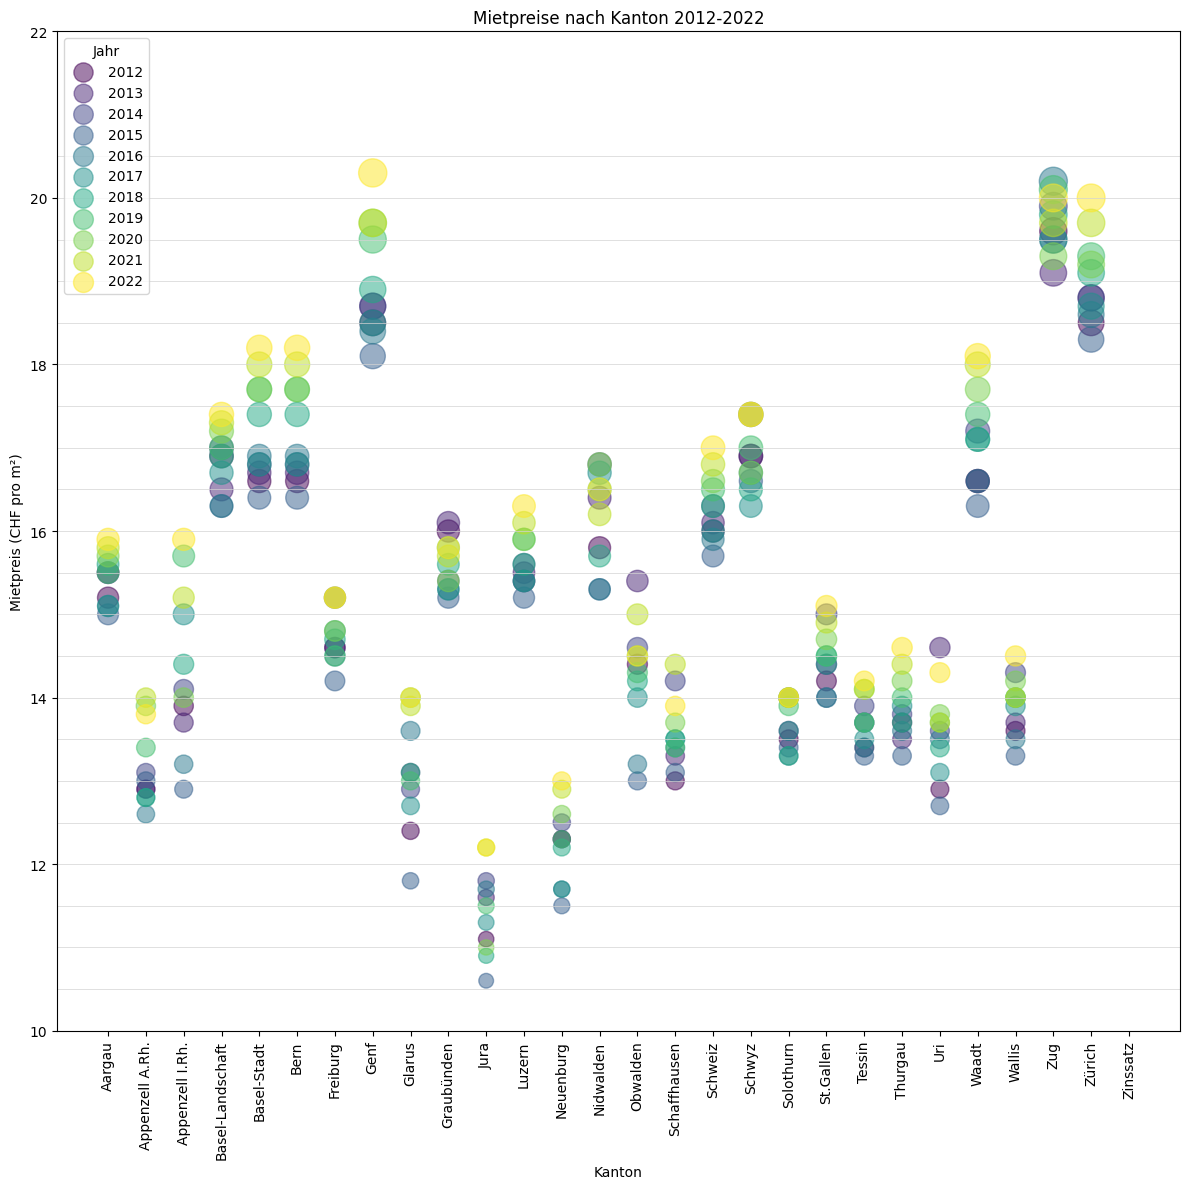

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # For color map

# Vorannahme: 'df' ist dein DataFrame

# Erstelle den Scatterplot
plt.figure(figsize=(12, 12), facecolor='white')  # Hintergrund der Figure transparent machen

colors = plt.cm.viridis(np.linspace(0, 1, 2023-2012))  # Generiere Farben für die verschiedenen Jahre

for i, Y in enumerate(range(2012, 2023)):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))

    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Füge die Daten des aktuellen Jahres zum Scatterplot hinzu
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color=colors[i], s=punktgroessen*punktgroessen, alpha=0.5, label=str(Y))  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent

# Fertigstellen des Plots
plt.title('Mietpreise nach Kanton 2012-2022')
plt.xlabel('Kanton')
plt.ylabel('Mietpreis (CHF pro m²)')
plt.xticks(rotation=90)
plt.ylim(10, 22)  # Setze die Grenzen der Y-Achse fest

# Füge horizontale Linien von 10 bis 20 mit einer Auflösung von 0.5 hinzu
for y in np.arange(10, 21, 0.5):  # Erstellt eine Sequenz von 10 bis 20, einschließlich 20, in Schritten von 0.5
    plt.axhline(y=y, color='lightgray', linestyle='-', linewidth=0.5)  # Zeichnet eine Linie bei jedem Wert von y

plt.legend(title='Jahr')
plt.tight_layout()
plt.show()


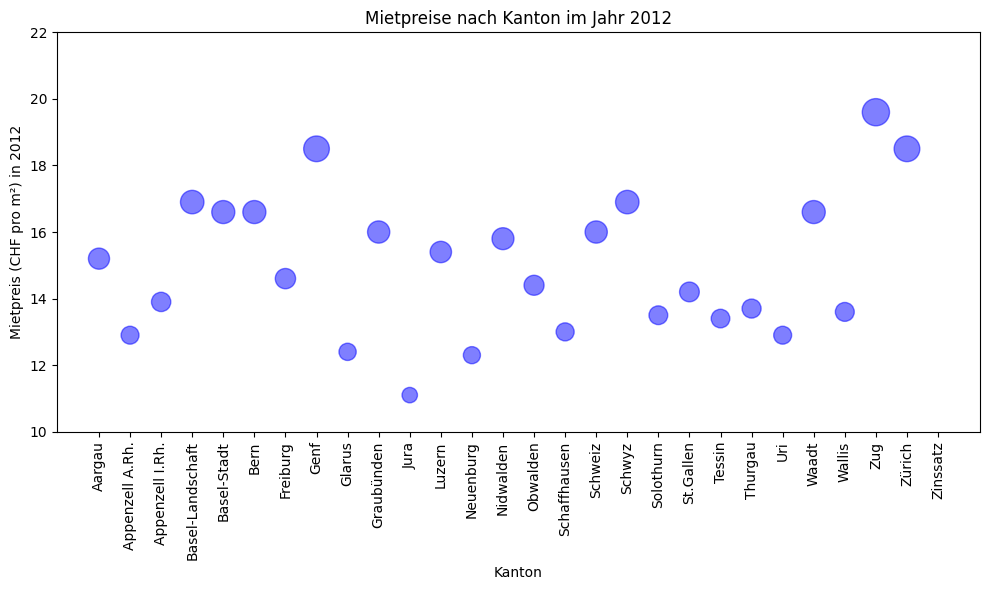

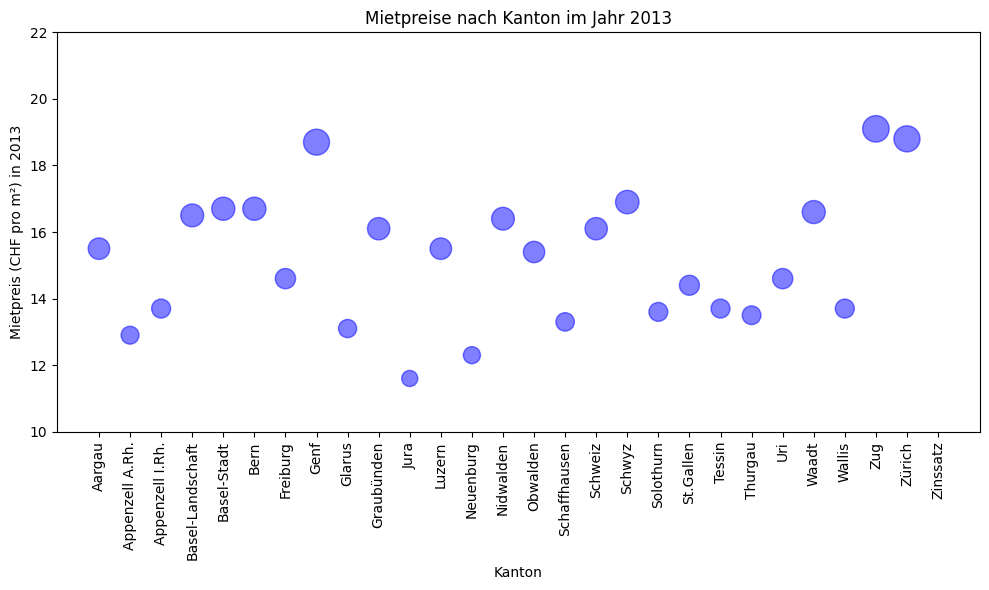

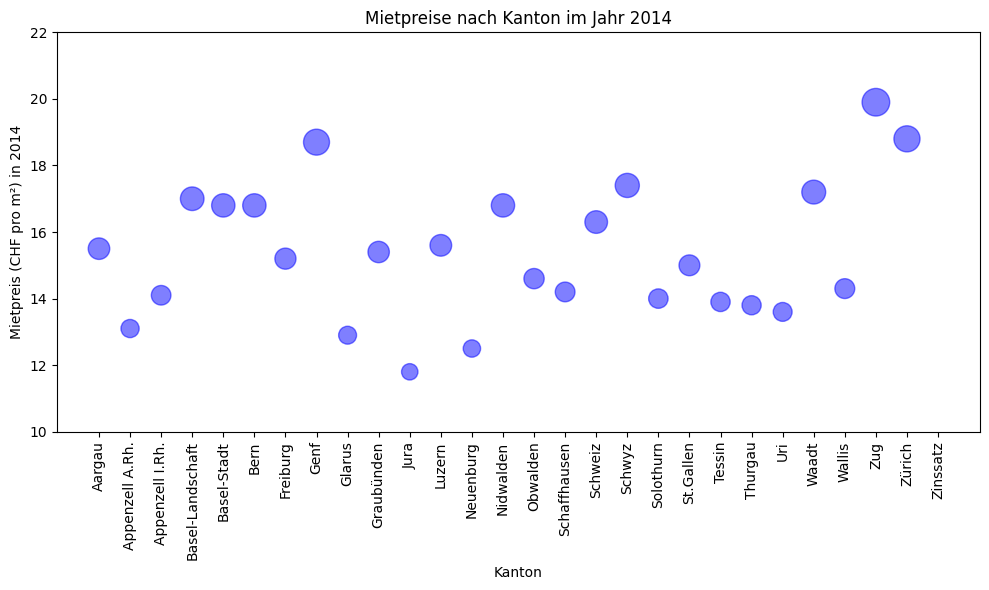

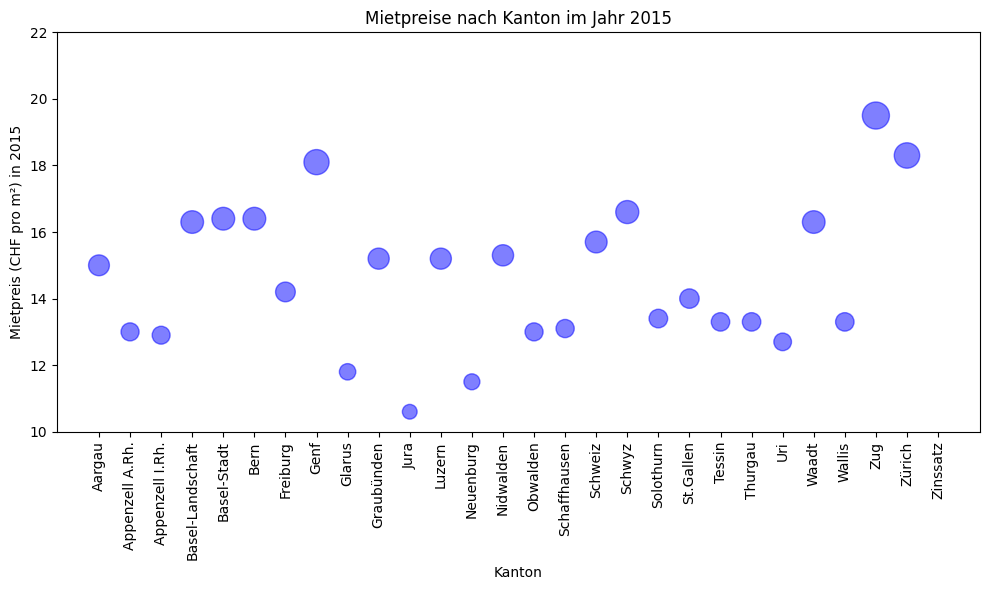

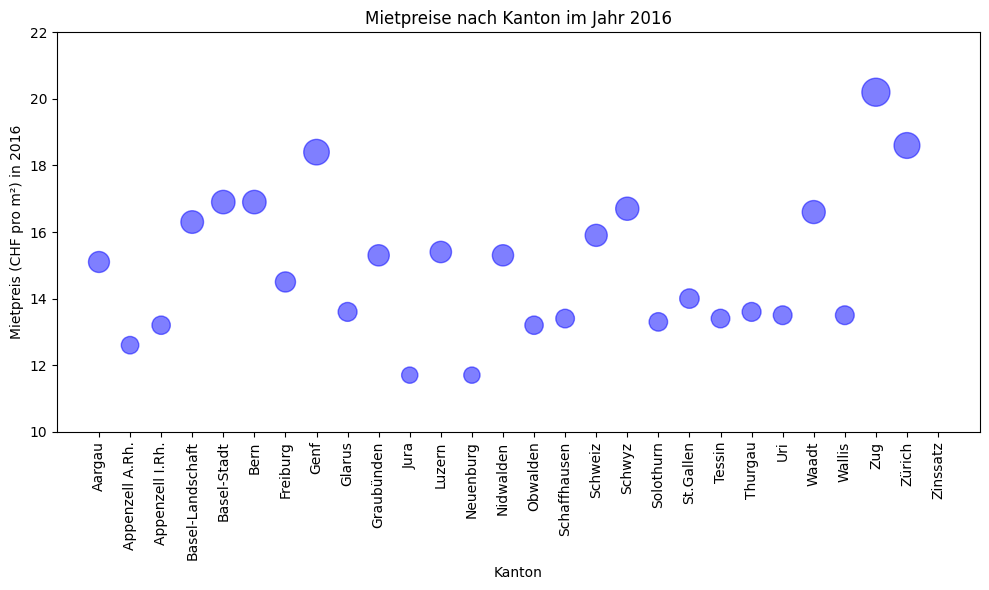

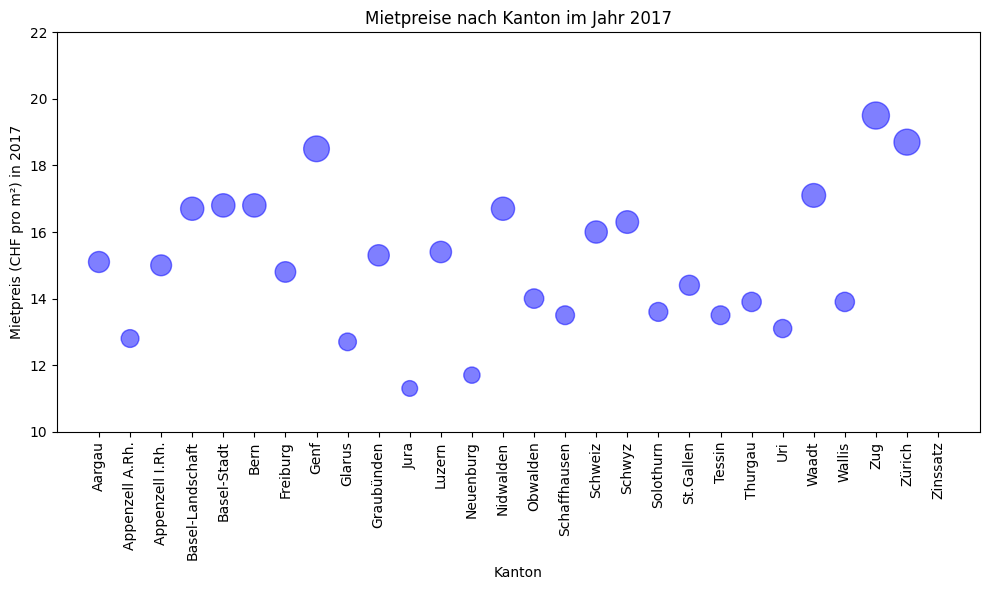

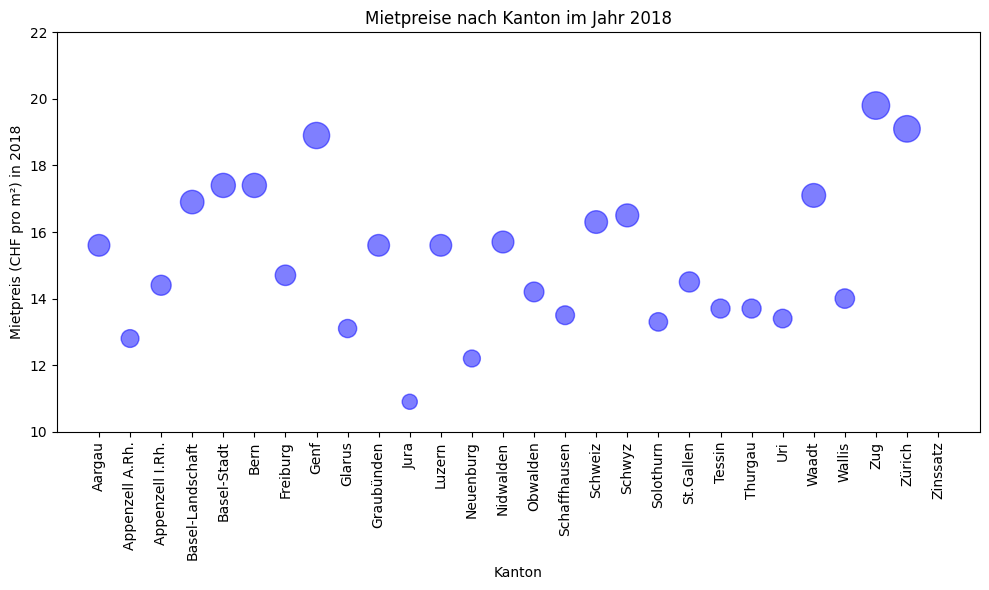

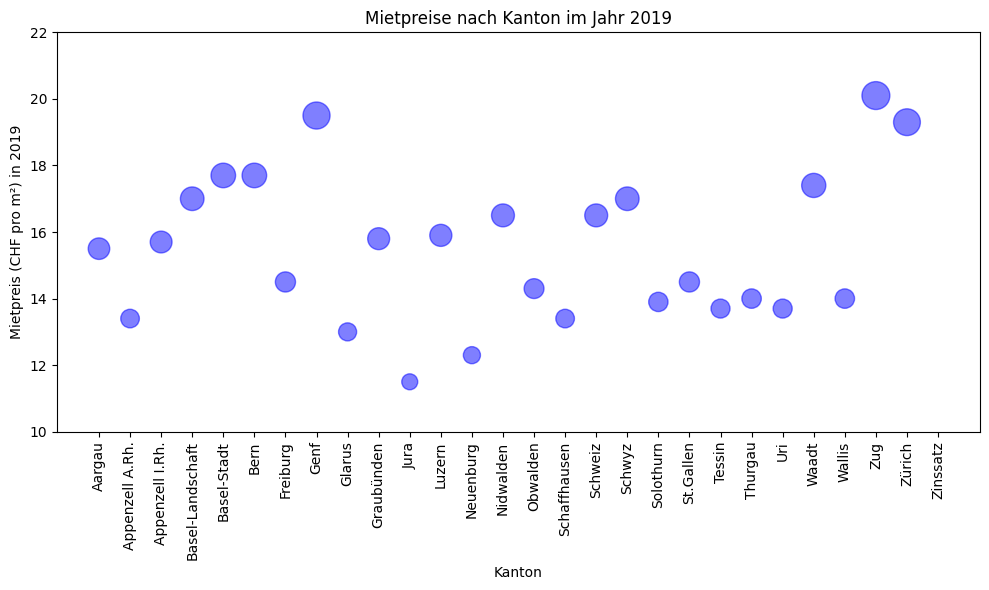

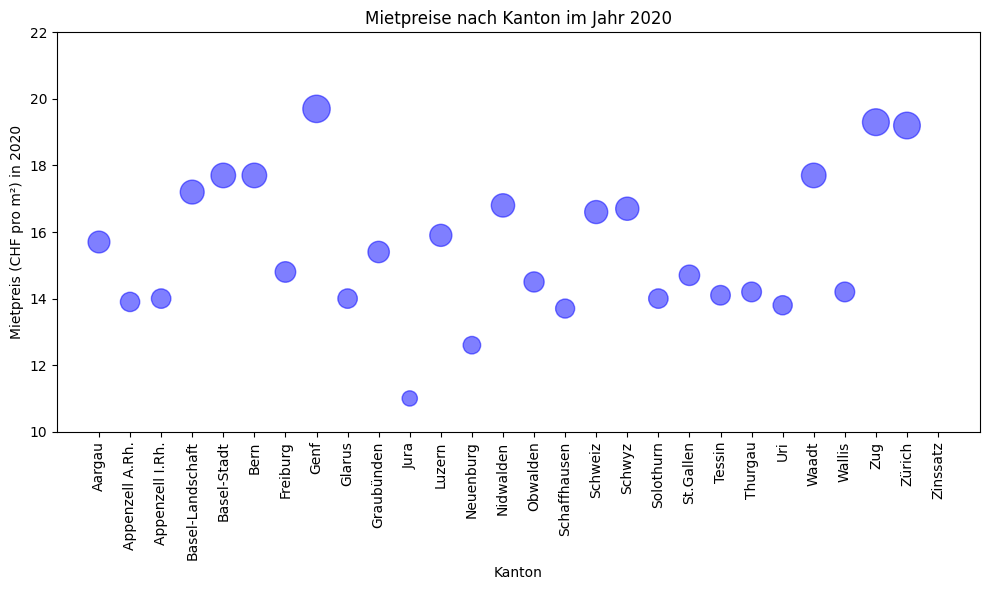

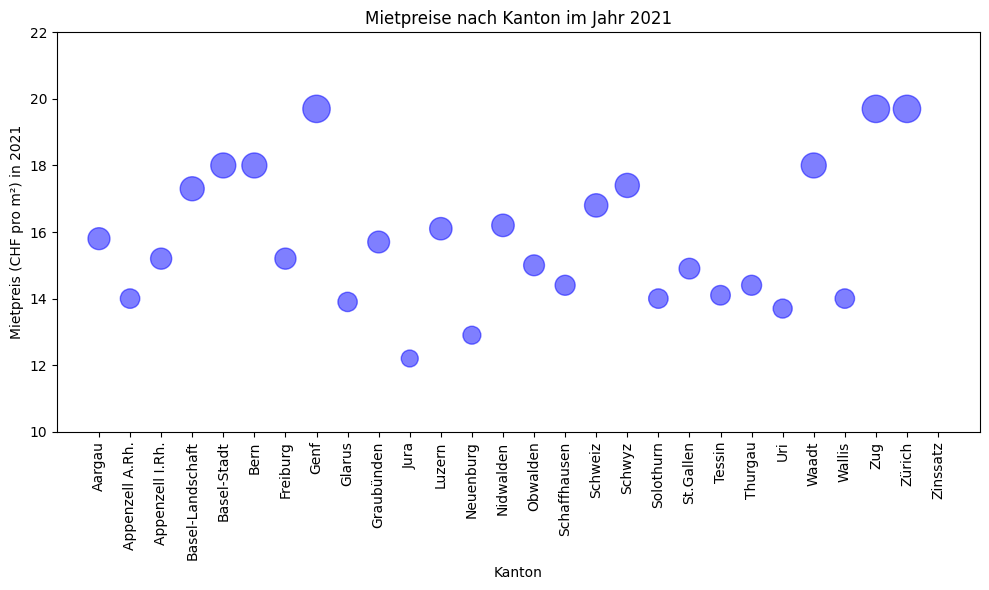

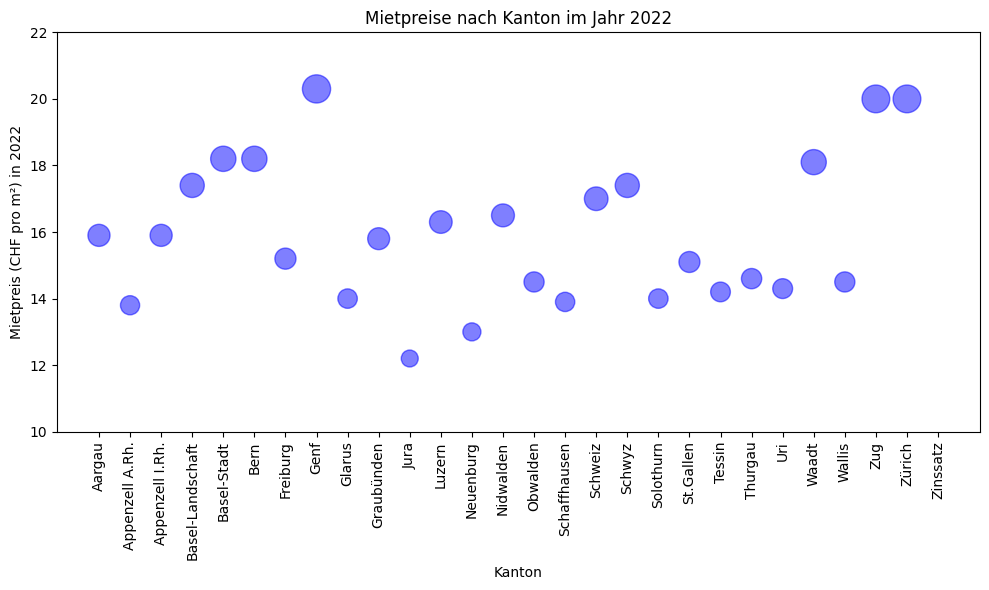

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Vorannahme: 'df' ist dein DataFrame

for Y in range(2012, 2023):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))

    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    # Hier setzen wir die Punktgröße gleich dem Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable
    trans = df[korrigierter_jahr_name]

    # Erstelle den Scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color='blue', s=punktgroessen*punktgroessen, alpha=0.5)  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent
    plt.title(f'Mietpreise nach Kanton im Jahr {Y}')
    plt.xlabel(korrigierter_kanton_name)
    plt.ylabel(f'Mietpreis (CHF pro m²) in {korrigierter_jahr_name}')
    plt.xticks(rotation=90)
    plt.ylim(10, 22)  # Setze die Grenzen der Y-Achse von 10 bis 25
    plt.tight_layout()
    plt.show()


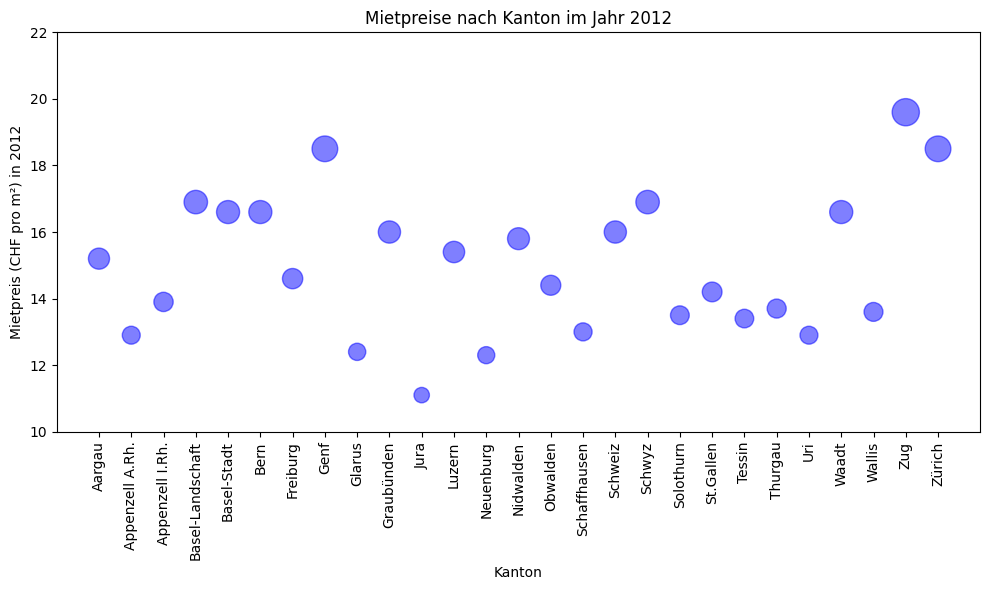

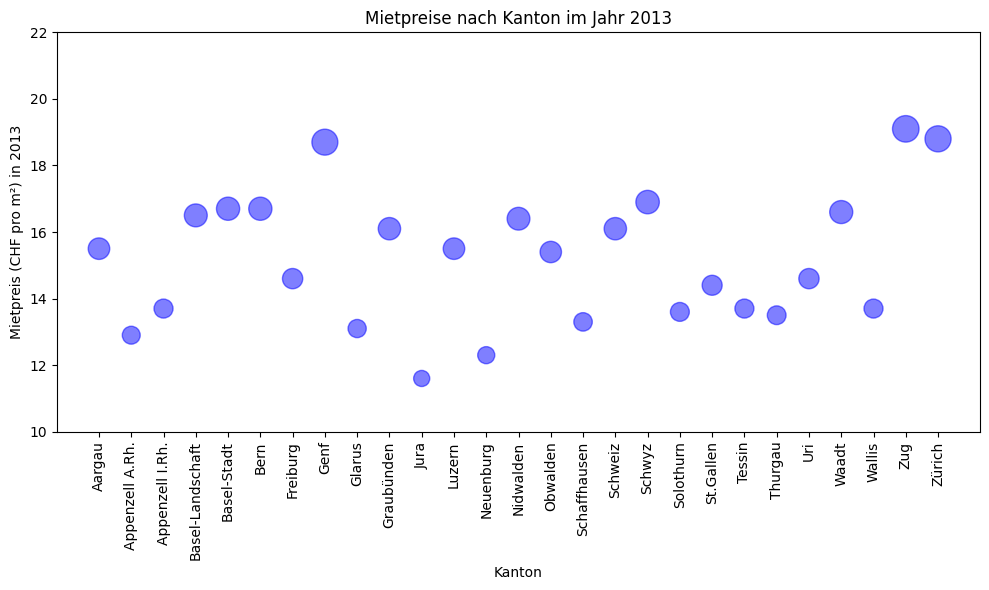

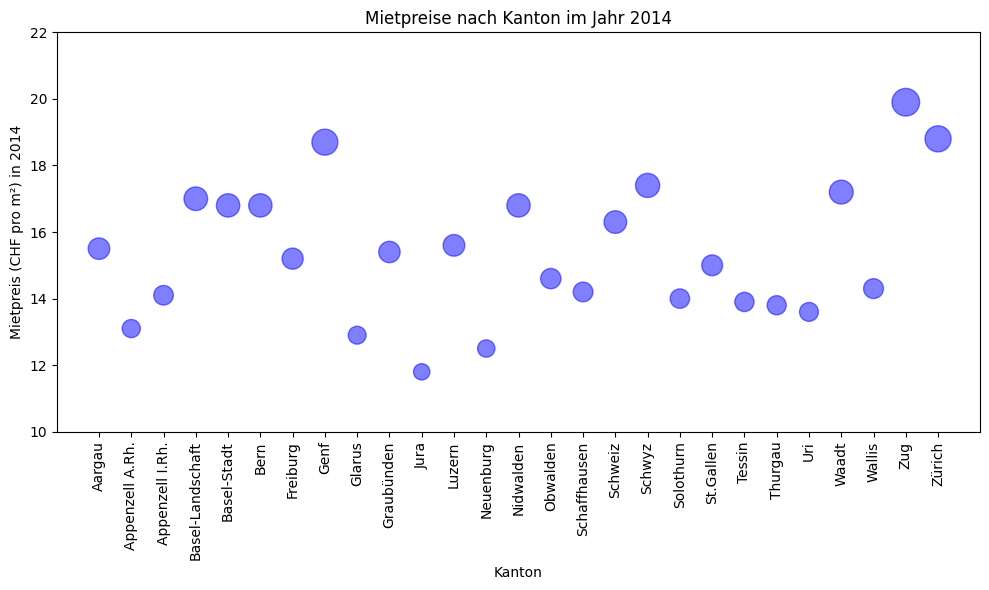

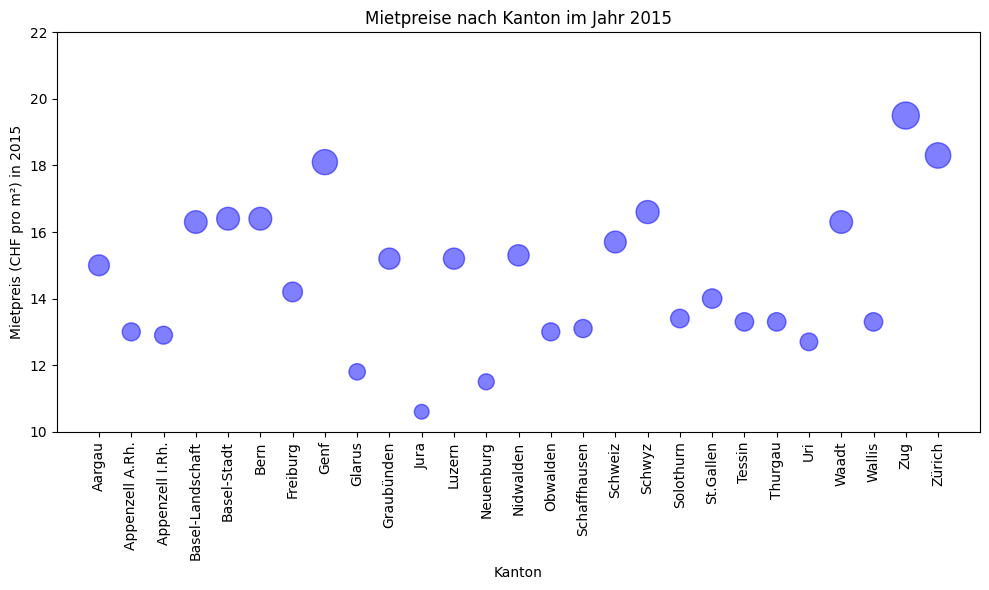

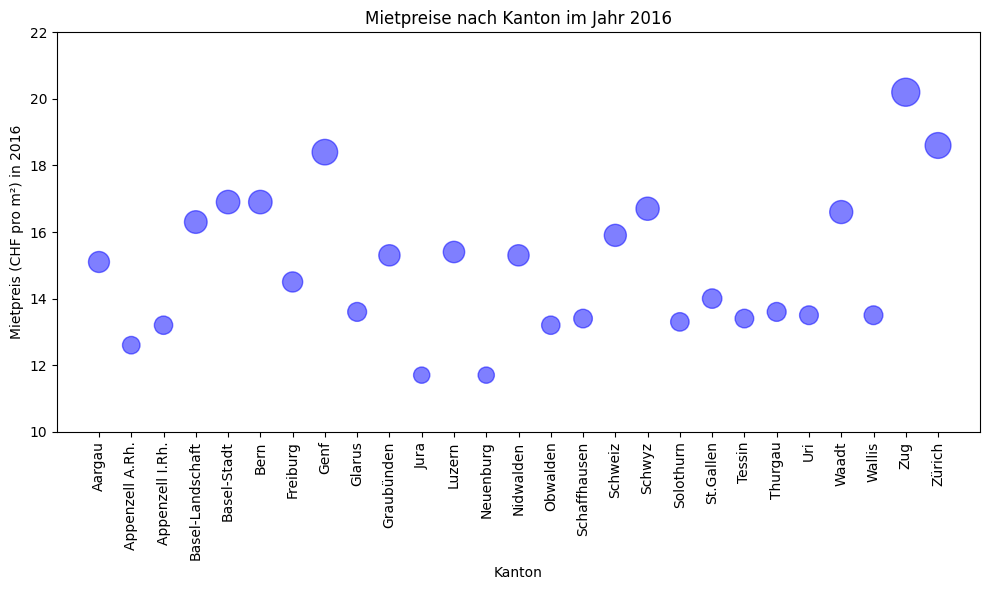

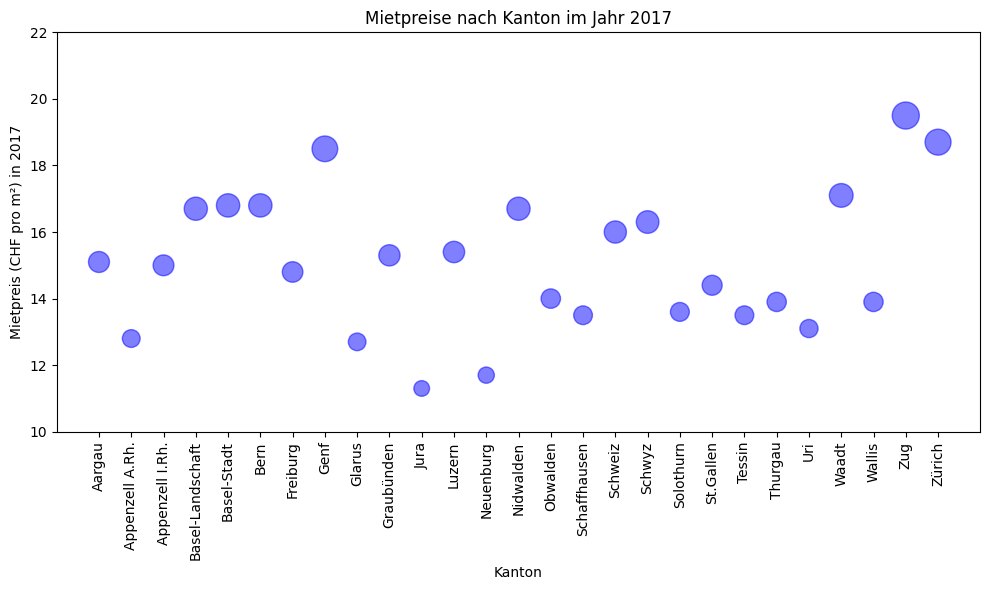

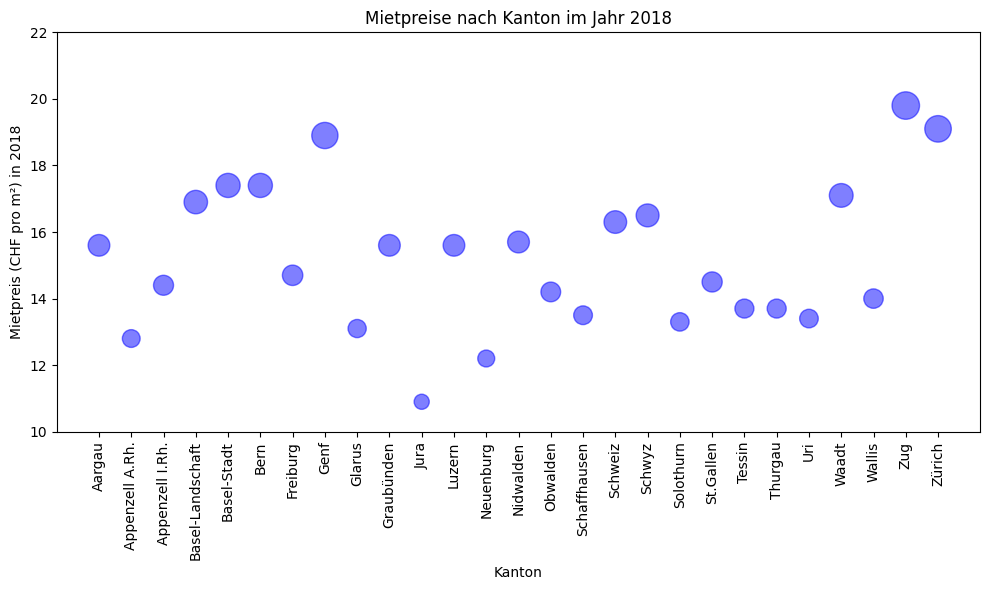

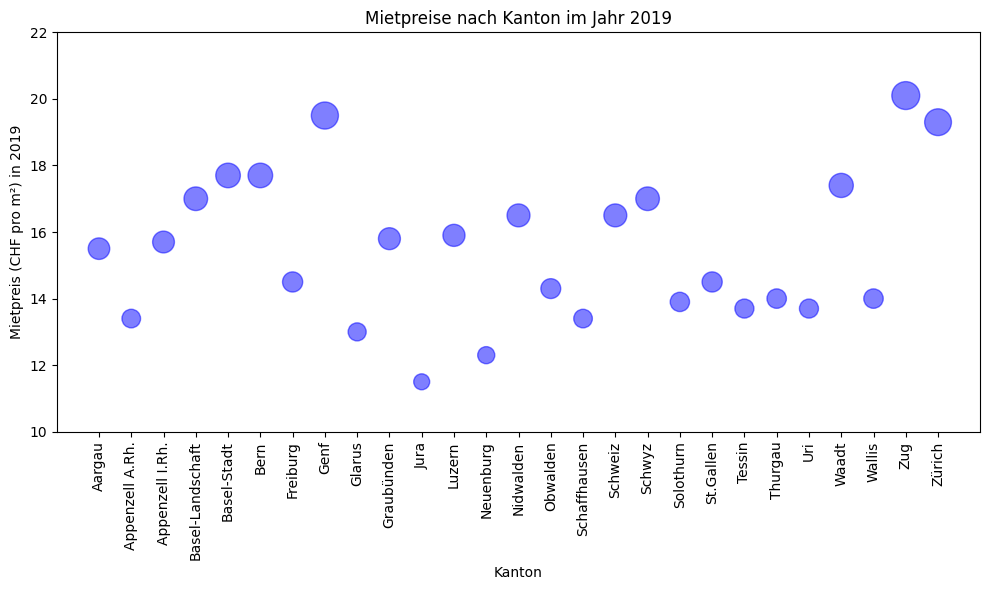

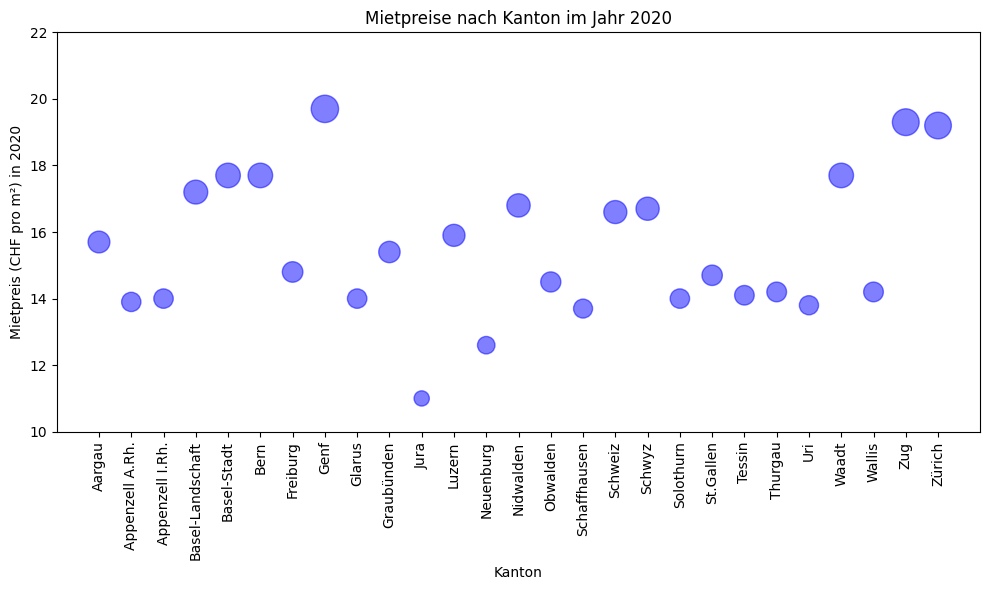

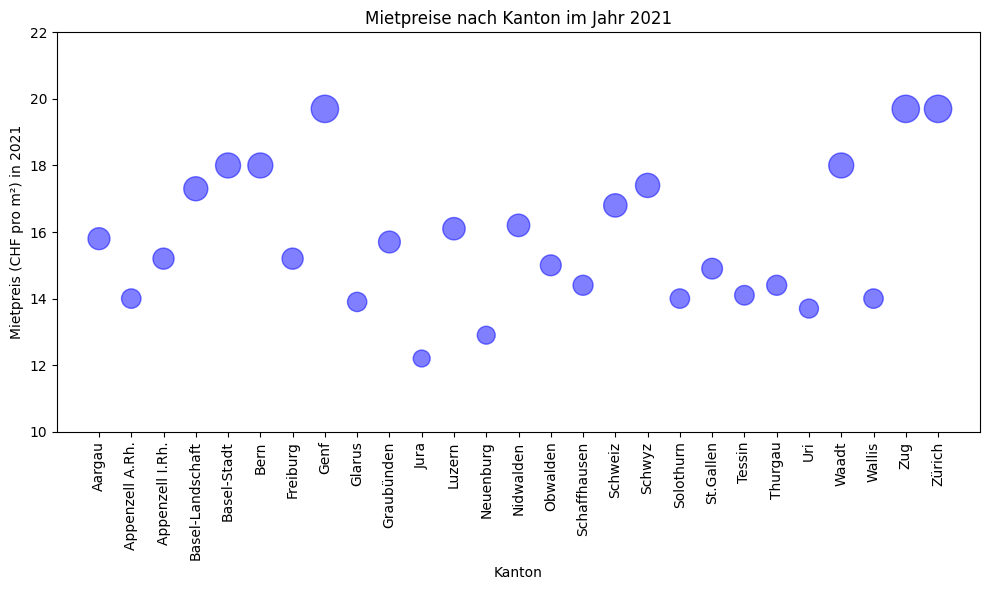

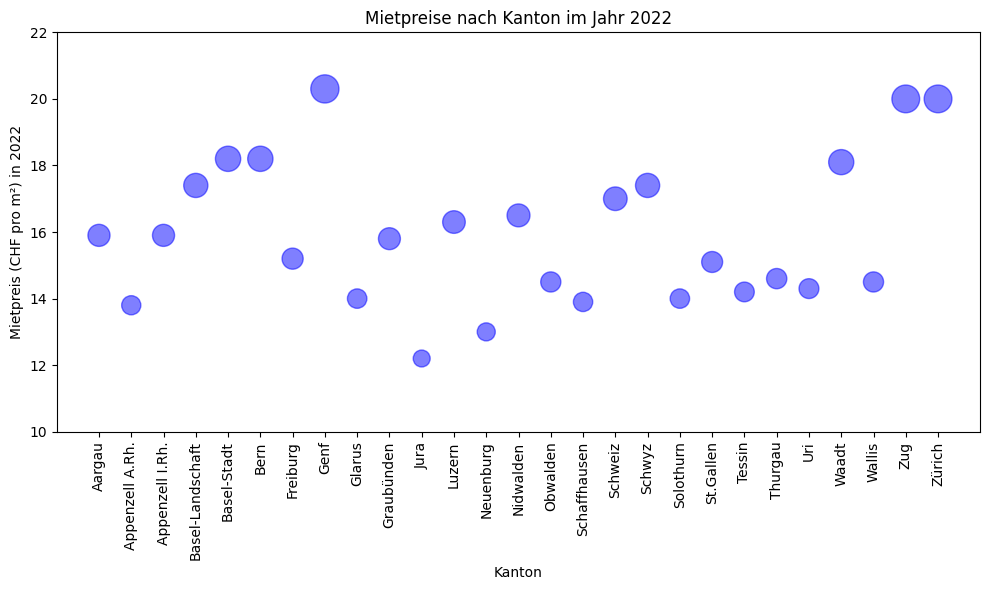

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Vorannahme: 'df' ist dein DataFrame

for Y in range(2012, 2023):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))

    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    # Hier setzen wir die Punktgröße gleich dem Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Erstelle den Scatterplot
    plt.figure(figsize=(10, 6), facecolor='none')  # Hintergrund der Figure transparent machen
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color='blue', s=punktgroessen*punktgroessen, alpha=0.5)  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent
    plt.title(f'Mietpreise nach Kanton im Jahr {Y}')
    plt.xlabel(korrigierter_kanton_name)
    plt.ylabel(f'Mietpreis (CHF pro m²) in {korrigierter_jahr_name}')
    plt.xticks(rotation=90)
    plt.ylim(10, 22)  # Setze die Grenzen der Y-Achse fest
    plt.tight_layout()
    plt.show()


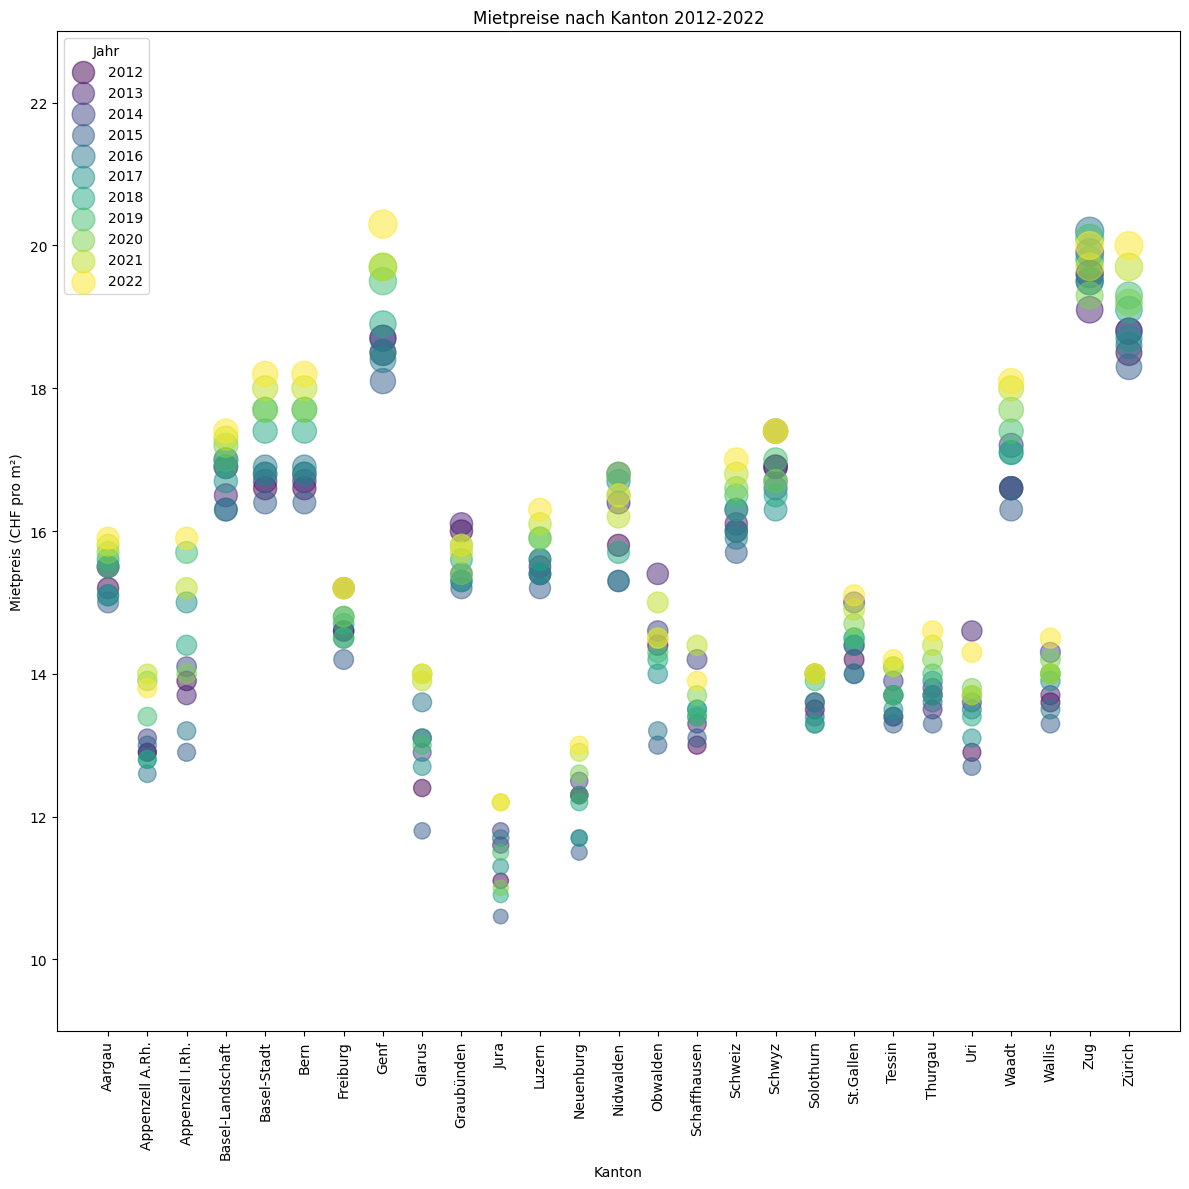

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # For color map

# Vorannahme: 'df' ist dein DataFrame

# Erstelle den Scatterplot
plt.figure(figsize=(12, 12), facecolor='white')  # Hintergrund der Figure transparent machen

colors = plt.cm.viridis(np.linspace(0, 1, 2023-2012))  # Generiere Farben für die verschiedenen Jahre

for i, Y in enumerate(range(2012, 2023)):
    # Korrigiere die Namen der Spalten
    spaltennamen = df.columns.tolist()
    korrigierte_spaltennamen = {str(spalte): spalte for spalte in spaltennamen}

    korrigierter_kanton_name = korrigierte_spaltennamen.get('Kanton', 'Kanton')
    korrigierter_jahr_name = korrigierte_spaltennamen.get(str(Y), next((name for name in korrigierte_spaltennamen if str(Y) in str(name)), None))

    # Berechne die Größen für die Scatterplot-Punkte basierend auf Mietpreis pro m²
    punktgroessen = df[korrigierter_jahr_name]  # Dies sollte eine Serie oder Liste von Werten sein, keine einzelne Variable

    # Füge die Daten des aktuellen Jahres zum Scatterplot hinzu
    plt.scatter(df[korrigierter_kanton_name], df[korrigierter_jahr_name], color=colors[i], s=punktgroessen*punktgroessen, alpha=0.5, label=str(Y))  # Verwende die Mietpreise als Punktgrößen und mache die Punkte transparent

# Fertigstellen des Plots
plt.title('Mietpreise nach Kanton 2012-2022')
plt.xlabel('Kanton')
plt.ylabel('Mietpreis (CHF pro m²)')
plt.xticks(rotation=90)

# Berechne neue Y-Achsen-Grenzen, um diese um 20% zu strecken
y_min, y_max = 11, 21  # Ursprüngliche Grenzen
y_range = y_max - y_min  # Berechne Bereich
y_stretch = y_range * 0.2  # Berechne Streckung
plt.ylim(y_min - y_stretch, y_max + y_stretch)  # Setze die neuen, gestreckten Grenzen

plt.legend(title='Jahr')
plt.tight_layout()
plt.show()


###Korrelation mit dem hypothekarischen Referenzzinssatz

###Leerstehende Wohnungen (1995-2023)

###Zusammenhang zwischen Mieten und Leerständen

---

##Diskussion und Ausblick

###Fazit

###Reflexion

###Ausblick